# Social Media Mining: Network Structure
### Vincent Malic - Spring 2018
## Module 9.2 Network Structure
* A social media network provides single snapshot of entities and relationships between them. * Examine network characteristics such as number of Facebook friends a person has. 
* Measures of connectivity, distribution, centrality, and connectedness

### Network Models
Use hypothesis testing to analyze graph structure: 
* **Random graph**: connections between nodes formed randomly with certain probability (32\%) 
* Compare random model with **Empirical model** based on real-world network 
* If two models are very different, then reject hypothesis that real connections are random.

# Network Metrics


## Degree Distribution of nodes with degree k
* Example: Twitter dataset from Social Computing Data Repository at ASU. 
* Dataset contains 11,316,811 nodes and 85,331,846 edges
* Random subset has 28,537 nodes, 3,004,415 edges.

### Directed network
* Follower network on Twitter, but saved, loading as undirected network to simplify for demo.

In [1]:
import numpy as np
np.random.seed(3057) # Set random seed since we'll be doing random stuff later.

import networkx as nx
G = nx.read_graphml("twitgraph.graphml")

In [2]:
G.number_of_nodes()

28537

In [3]:
G.number_of_edges()

3004415

## Obtain degree of a node using the graph method ``degree``
* Pass the name of a node. 
* Twitter network was anonymized, so node names are integers (integers are strings in Graph). * The degree of node ``'5729987'`` is 78.

In [4]:
some_node = '5729987'
G.degree(some_node)

78

### Pass multiple nodes to ``degree`` 
* Passing a list of node names to `degree` function. 
* Returns a dictionary with node names as keys and their corresponding degree as values. 

In [5]:
G.degree(['5729987', '1958438'])

{'1958438': 2, '5729987': 78}

### Pass degree a list of all the nodes:

In [6]:
all_nodes = G.nodes()
all_degrees = G.degree(all_nodes)

In [9]:
all_nodes

['983041',
 '1441794',
 '4',
 '655365',
 '6',
 '4521992',
 '13',
 '14',
 '6867573',
 '16',
 '17',
 '1638420',
 '196630',
 '196631',
 '3473437',
 '3473438',
 '196613',
 '8912928',
 '1507362',
 '2883620',
 '37',
 '38',
 '196648',
 '8781870',
 '1572912',
 '1638449',
 '7405620',
 '1507381',
 '9044022',
 '57',
 '1572922',
 '196668',
 '1900607',
 '131136',
 '3145794',
 '65605',
 '2883655',
 '2621515',
 '196684',
 '6619213',
 '2883662',
 '4784207',
 '7209043',
 '3473495',
 '1048665',
 '655453',
 '4391007',
 '655458',
 '2883684',
 '9896040',
 '721002',
 '2490475',
 '327791',
 '8388725',
 '3593577',
 '262271',
 '200772',
 '393345',
 '917639',
 '135300',
 '1507479',
 '4391064',
 '3473562',
 '983199',
 '1507490',
 '655525',
 '8061094',
 '2097319',
 '6815912',
 '196780',
 '4784305',
 '5985651',
 '2621621',
 '4980921',
 '1507515',
 '4522172',
 '917693',
 '15282',
 '3997894',
 '786634',
 '590030',
 '8388815',
 '196816',
 '2883793',
 '393428',
 '590038',
 '721113',
 '4915421',
 '5448633',
 '655397',


In [10]:
all_degrees

[5,
 135,
 515,
 377,
 152,
 19,
 661,
 423,
 109,
 467,
 800,
 105,
 206,
 251,
 5,
 35,
 337,
 4,
 45,
 21,
 1567,
 741,
 357,
 31,
 69,
 3,
 4,
 159,
 15,
 474,
 21,
 385,
 21,
 8,
 47,
 7,
 21,
 47,
 292,
 34,
 103,
 219,
 139,
 900,
 10,
 318,
 1,
 185,
 45,
 2,
 154,
 145,
 1,
 16,
 15,
 70,
 437,
 220,
 7,
 500,
 175,
 12,
 5,
 221,
 363,
 296,
 1,
 3,
 19,
 3524,
 60,
 12,
 77,
 1006,
 63,
 229,
 19,
 229,
 4,
 5,
 44,
 2,
 1657,
 15,
 283,
 63,
 6,
 325,
 426,
 19,
 197,
 1,
 1,
 1,
 1,
 1,
 7,
 4,
 1,
 8,
 1,
 1,
 1,
 41,
 6,
 1,
 1,
 1,
 1,
 16,
 1,
 1,
 1,
 113,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 18,
 1,
 3,
 2,
 2,
 5,
 11,
 1,
 16,
 1,
 2,
 1,
 1,
 201,
 42,
 2,
 3,
 14,
 1,
 1,
 11,
 840,
 5,
 32,
 6,
 1,
 1,
 1,
 2,
 2,
 8,
 3,
 4,
 5,
 12,
 5,
 1,
 32,
 1,
 8,
 2,
 4,
 1,
 3,
 46,
 2,
 1,
 232,
 21,
 1,
 3,
 37,
 16,
 2,
 2,
 2,
 2,
 98,
 1,
 1,
 3,
 4,
 2,
 1,
 1,
 2,
 2121,
 9,
 1,
 4,
 2,
 211,
 103,
 4,
 78,
 951,
 615,
 122,
 2396,
 39,
 12,
 26,
 309,
 4,
 12,


### Use ``.values()`` method on node dictionary 
* Variable ``all_degrees`` is a dictionary, with keys as node names and values as their degrees. 
* Select degrees, pulling out just the values
* **Convert it into a list**.

In [7]:
all_degrees = list(all_degrees.values())

In [8]:
all_degrees[:25]

[5,
 135,
 515,
 377,
 152,
 19,
 661,
 423,
 109,
 467,
 800,
 105,
 206,
 251,
 5,
 35,
 337,
 4,
 45,
 21,
 1567,
 741,
 357,
 31,
 69]

### What degrees do we have?
* The minimum is not too surprising:

In [11]:
import numpy as np
np.min(all_degrees)

1

The minimum degree a node can have is 1 (otherwise it wouldn't be a part of the graph at all). Here's the max: 

In [12]:
np.max(all_degrees)

12240

#### Someone in this network with an impressive 12,240 followers.

In [ ]:
np.median(all_degrees)

### Median degree is 51. 
* Median is much closer to the minimum than the maximum, indicating a skewed distribution. 

# Visualizing Degree Distribution:
* **x-axis** will represent a degree, starting with 1, incrementing by 1 (e.g., 1, 2, 3,..., 12,240)
* **y-axis** will plot *number of nodes that have that corresponding degree on the x-axis*. 

### NetworkX function called ``degree_histogram`` 
* Returns a list where the element at index 0 is a count of how many nodes have a degree of 0
* The element of index 1 indicates how many nodes have a degree of 1, 
* and so on... 

In [27]:
dh = nx.degree_histogram(G)
dh

[0,
 3327,
 1454,
 968,
 713,
 616,
 503,
 370,
 382,
 319,
 332,
 276,
 285,
 210,
 218,
 226,
 195,
 187,
 188,
 172,
 161,
 167,
 143,
 163,
 150,
 116,
 120,
 128,
 116,
 119,
 112,
 112,
 98,
 102,
 110,
 103,
 102,
 110,
 76,
 102,
 97,
 86,
 82,
 86,
 79,
 103,
 80,
 84,
 75,
 65,
 71,
 83,
 62,
 59,
 63,
 68,
 73,
 50,
 68,
 73,
 63,
 48,
 59,
 57,
 43,
 60,
 56,
 57,
 48,
 66,
 62,
 52,
 49,
 61,
 51,
 51,
 45,
 47,
 47,
 46,
 54,
 39,
 49,
 48,
 44,
 50,
 38,
 48,
 45,
 33,
 42,
 34,
 44,
 41,
 44,
 44,
 61,
 38,
 50,
 49,
 46,
 27,
 46,
 48,
 39,
 36,
 34,
 42,
 36,
 39,
 46,
 34,
 31,
 38,
 50,
 39,
 41,
 39,
 36,
 32,
 30,
 38,
 33,
 38,
 33,
 37,
 39,
 35,
 35,
 42,
 29,
 33,
 31,
 30,
 34,
 37,
 27,
 32,
 35,
 31,
 22,
 26,
 26,
 33,
 39,
 29,
 32,
 32,
 33,
 23,
 35,
 37,
 32,
 36,
 26,
 30,
 31,
 25,
 28,
 34,
 32,
 30,
 28,
 26,
 27,
 30,
 22,
 47,
 26,
 29,
 30,
 30,
 36,
 26,
 20,
 27,
 29,
 43,
 28,
 29,
 26,
 22,
 27,
 24,
 27,
 42,
 21,
 30,
 32,
 23,
 26,
 23,
 

## Frequency distribution of nodes by degree
* 0 nodes that have a degree of 0 (which makes sense), 
* 3327 nodes with a degree of 1, 
* 1454 nodes with a degree of 2, and so on. 

### Plot the distribution:

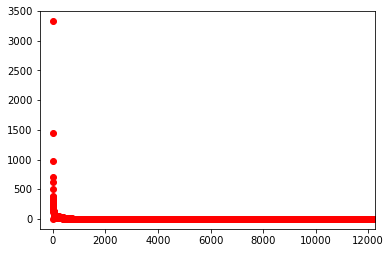

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlim(-500, max(all_degrees))
plt.plot(dh, "ro")

### Visualization of degree distribution
* Many nodes have degree of 1, fewer nodes with degree of 2, and fewer with degree of 3, etc. 
* As degree increases, number of nodes quickly decreases *so quickly*, forming "L" shape
* `Hockey-stick` shaped distribution: "many low degree nodes, a few high degree nodes."

## Take logarithm transformation of both axes 
* Indication of multiplicative process in the data 
* As degree increases, node count seems to be a *fixed proportion* of the previous count.  
* Taking logarithm of values transforms data into an additive process. 

### Plot same data on logarithmic axes.

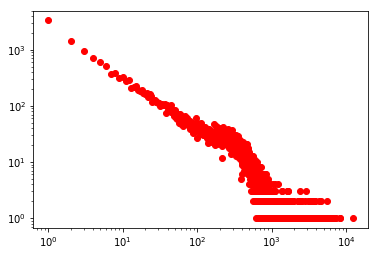

In [17]:
plt.xscale("log")
plt.yscale("log")
plt.plot(dh, "ro")

# Power-law distribution
* When degree distribution is plotted on log-log axes, we get *something* approximating a line 
* In statistics, a line in a log-log plot constitutes *some* evidence that the phenomena follows a [*power law distribution*](https://en.wikipedia.org/wiki/Power_law), where 

$$
p_k = C \cdot \frac{1}{k^{\alpha}}
$$

#### Number of nodes with degree $k$ is proportional to some constant $C$ times one over $k$ raised to $\alpha$. 
* This formula, if true, explains the rapid dropoff: 
* As node degree $k$ increases, number of nodes with degree $k$ drops off rapidly 
* as $k$ is exponentiated by some number $\alpha$.

### The power law distribution is observed in many real world social networks, 
* Caveat: generall, "finding the powerlaw" has become somewhat of a trend
* Statisticians (Cosma Shalizi) are finding power laws where there don't actually exist. (http://bactra.org/weblog/491.html)
* Takeaway: degree distributions in real-world networks are heavily right-skewed. 

# Clustering Coefficient
* Indicates how dense connections surrounding that node are. 
* Measure of how connected a certain part of graph is. 

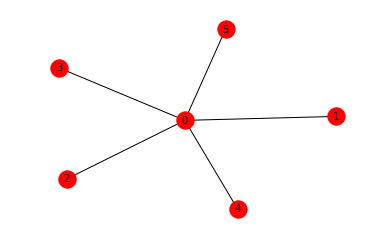

In [29]:
sample = nx.generators.star_graph(5)

pos = nx.spring_layout(sample, iterations=100)
nx.draw_networkx_nodes(sample, pos, node_size = 300)
nx.draw_networkx_edges(sample, pos)
nx.draw_networkx_labels(sample, pos, font_size=10)
plt.axis("off")
plt.show()

### Sample social network - star graph
* Hub node, 0, and 5 other nodes are connected to node 0 but *no other nodes*. 
* 0 might be a boss, who commands the other 5 nodes, but there are no other connections: 
* 5 employees don't know or contact eahch other, they are isolated. 

## Star Graph
* Composed of multiple open triangles, highly unusual. 
* An open triangle is a configuration of 3 nodes that looks like this:

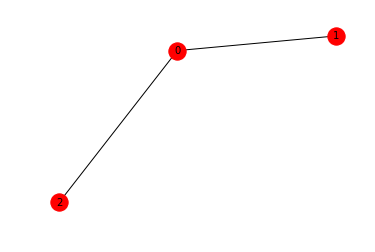

In [19]:
sample = nx.generators.star_graph(2)

pos = nx.spring_layout(sample, iterations=100)
nx.draw_networkx_nodes(sample, pos, node_size = 300)
nx.draw_networkx_edges(sample, pos)
nx.draw_networkx_labels(sample, pos, font_size=10)
plt.axis("off")
plt.show()

0 knows 1, 0 knows 2, but 1 and 2 don't know each other. 

### In network of Facebook friends,
* We would expect that at least *some* of those open triangles would become *closed*. 
* If Etta knows Janek, and Etta also knows Sofia, 
* There is some probability that Etta will introduce Janek to Sofia and *close the triangle*.

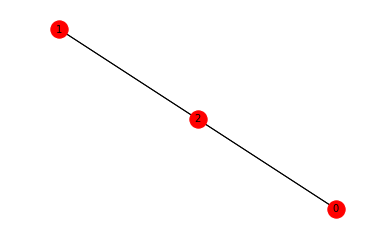

In [20]:
sample = nx.generators.complete_graph(3)

pos = nx.spring_layout(sample, iterations=100)
nx.draw_networkx_nodes(sample, pos, node_size = 300)
nx.draw_networkx_edges(sample, pos)
nx.draw_networkx_labels(sample, pos, font_size=10)
plt.axis("off")
plt.show()

## Clustering coefficient for a *given node* 
* The number of *closed triangles* taht node is in, divided by the number of *possible closed triangles* the node could be in. 
* Find the clustering coefficient of a target node with networkx function ``clustering``. 

### In star structure
* Clustering coefficient of the hub node is 0, as there are no possible triangles:

In [21]:
from networkx.algorithms import clustering
sample = nx.generators.star_graph(2)
clustering(sample, 0)

0.0

### Artificially close one of triangles in Star network.

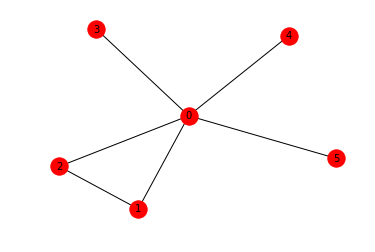

In [22]:
sample = nx.generators.star_graph(5)
sample.add_edge(1, 2)
pos = nx.spring_layout(sample, iterations=100)
nx.draw_networkx_nodes(sample, pos, node_size = 300)
nx.draw_networkx_edges(sample, pos)
nx.draw_networkx_labels(sample, pos, font_size=10)
plt.axis("off")
plt.show()

What's the clustering coefficient of node 0?

In [23]:
clustering(sample, 0)

0.1

#### Clustering coefficient of the hub is 0.1
* One existing triangle out of 10 potential triangles (1/10) possible among 0's neighbors. 

## Fully Connected Graph 
* *Everyone* knows *everyone else*.
* Graph is fully connected among nodes 
* Hub belongs to 10 out of 10 triangles, **clustering coefficient is 1.0**

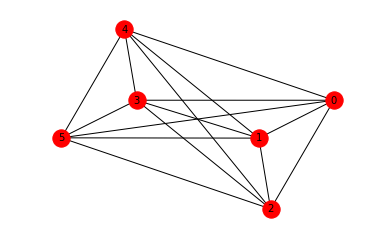

In [24]:
sample = nx.generators.complete_graph(6)
pos = nx.spring_layout(sample, iterations=100)
nx.draw_networkx_nodes(sample, pos, node_size = 300)
nx.draw_networkx_edges(sample, pos)
nx.draw_networkx_labels(sample, pos, font_size=10)
plt.axis("off")
plt.show()

In [25]:
clustering(sample, 0)

1.0

##### Now the clustering coefficient for node 0 is 1.0: 
* Of all the possible triangles that could be formed, they *are* formed.

### Clustering coefficient is a *node level metric*. 
* You pick a specific node and calculate its clustering coefficient
* In a real-world network, some may have high clustering, some may have low clustering. 

## Average Clustering Coefficient is *network level metric* 
* Calculate clustering coefficient for all nodes in the graph and taking their average. 
* Note: ** often computationally infeasible** for very large networks

### NetworkX function ``average_clustering`` 
* **estimates** average clustering coefficient by sampling some of possible triangles. 
* The number of samples is indicated by the optional parameter ``trials``. 
* The higher the trials, the more accurate estimate, but takes longer to calculate.

In [26]:
from networkx.algorithms.approximation import average_clustering

acc = average_clustering(G, trials=10000)
acc

0.2315

#### Estimated average clustering coefficient for Twitter network is around 0.23. 
* For any given node in graph, 23% of potential triangles that could be formed among its neighbors actually do exist.

# Shortest Path
* For any two nodes, there are multiple paths in network from one to the other
* One of these paths must be the *shortest*. 
* Use NetworkX function `shortest_path` to calculate shortest path between two nodes 

In [32]:
from networkx.algorithms import shortest_path
shortest_path(G, '5729987', '1958438')

['5729987', '2283', '365187', '1958438']

#### It takes 3 hops to get from ``'5729987'`` to node ``'1958438'``. 


# Average Shortest Path*
* Calculate shortest path between all possible pairs of nodes and calculate the average
* Provides intuition about the "diameter" of the network. 
* E.g., "6 Degrees of separation from Kevin Bacon", in the actor network 

## Estimate average shortest path
* Calculating for entire graph is infeasible with large number of nodes is large. 
* With 28,537 nodes, there would be 407,165,916 paths we would have to calculate. 
* Take *sample* pairs of nodes, and estimate average shortest path using those samples.

### NOTE: NetworkX does not have a function to do this
* Function written below with sample network and calculate average shortest path

In [33]:
from networkx.algorithms import shortest_path
import numpy as np

def estimate_asp(G, trials=100000):
    nodes = G.nodes()
    sources = np.random.choice(nodes, trials)
    destinations = np.random.choice(nodes, trials)
    path_lengths = []
    for i in range(len(sources)):
        this_path = shortest_path(G, sources[i], destinations[i])
        if this_path:
            path_lengths.append(len(this_path)-1)
    return np.mean(path_lengths)

In [34]:
asp = estimate_asp(G)
asp

2.6914600000000002

#### With 100,000 samples, we estimate the shortest path length to be 2.69. 
* The diameter of this Twitter network is actually quite small; 
* In about 3 hops, you can probably get from a given node to almost every other node in  network.

# Proposing a model and comparing it to a real-world network
* Generate random network using that model, and compare it with our real world Twitter network * Compare graphs by degree distribution, clustering coefficient, and average shortest path.
* Null model assumes links between two nodes are created randomly, with certain probability. 

## Erdos-Renyi Random Graph
* Random graph is also known as `Erdos-Renyi` graph. 
* Takes two parameters: the number of nodes, and the probability of a link between the nodes. 
* Use same number of nodes as real world graph, and for probability of edge, $p$, with formula:

$$
p = \frac{c}{n-1}
$$

where $c$ is the average degree of our real-world network and $n$ is the number of nodes in our real world network.

In [35]:
p = np.mean(all_degrees)/(G.number_of_nodes() - 1)

In [36]:
p

0.0073788470054551416

In [37]:
erg = nx.generators.erdos_renyi_graph(G.number_of_nodes(), p)

## Degree Distribution

Let's look at the degree distribution.

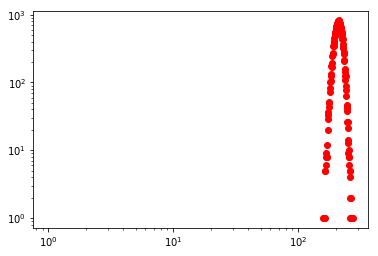

In [38]:
ergdh = nx.degree_histogram(erg)
plt.xscale("log")
plt.yscale("log")
plt.plot(ergdh, "ro")

Degree distribution of random Erdos-Renyi graph looks *nothing* like distribution of real world graph; strong indication that this isn't the right model. 

## Look at Average Clustering Coefficient:

In [41]:
average_clustering(erg, trials=10000)

0.0073

Average clustering coefficient for Twitter graph was 0.24, whereas for Erdos-Renyi graph it's 0.0051. Again, not a good match. 

## Look at average shortest path: 

In [42]:
estimate_asp(erg)

2.2043900000000001

Average shortest path for random network is 2.20, but for real-world network it is 2.69. This is actually in the ball park.

### Model Comparison 
* Random graph does *not* capture degree distribution or clustering coefficient of real-world network, but random graph and Twitter network both have short average path lengths
* In real-world network, most people have few followers, but some have many; some preference being exercised when follower relationships are made, e.g. it's **not random**.
* Element of randomness in network of human social, but not *all* relationships formed randomly.

# Small-World Networks
* Developed by Watts and Strogatz in 1997.
* Most people *begin with essential small-world network* (e.g., family members, friends). 
* People have some *given* set of core relationships, but *some* relationships that are formed randomly.

### Ring lattice network 
* Start with set of $n$ nodes. Arrange these nodes in a ring. 
* Depending on parameter $k$ (even-integer), connect each node to $k/2$ neighbors to its left, and $k/2$ neighbors to its right. 
* Each node will have some minimum "community" from the beginning.

### Constructing Small world network
* Visit each existing edge and *rewire* it with a probability $p$. 
* For low $p$, there will be some randomness, but the "core communities" in the lattice graph will remain. 
* For maximum value of $p=1$, graph simply becomes a random graph. Here's an image that illustrates:

<img src="http://www.nature.com/nature/journal/v393/n6684/images/393440aa.eps.2.gif">

## Simulate Twitter graph with Small-world network. 
We need three parameters:
1. $n$, the number of nodes.
2. $k$, the number of neighbors to connect to in the original lattice graph.
3. $p$, the probability of rewiring. 

$n$, of course, is simply the number of nodes in our twitter Graph.
For $k$, we'll use the average degree of our Twitter Graph.

In [43]:
n = G.number_of_nodes()

k = np.mean(all_degrees)
k

210.56277814766793

We want $k$ to be an even number, so we'll floor it:

In [44]:
k = np.floor(k)
k = int(k)
k

210

### Derive value of $p$ from Graph
* Use some math that we won't go into today. 
* Check out section 4.3 in Zafarani's Social Media Mining textbook.

In [45]:
p = 1 - ((acc*4*(k-1))/(3*(k-2)))**(1/3)

## Use NetworkX generator 
* Create Watts Strogatz small-world network, passing 3 parameters just calculated. 

In [46]:
wsg = nx.generators.watts_strogatz_graph(n, k, p)

### Compare Watts-Strogatz graph to real-world Twitter graph. 
* Variable ``wsg`` is Watts-Strogatz graph attempting to mimic real-world Twitter graph. 
* If Twitter graph developed along same lines as a Watts-Strogatz graph, they should be similar in degree, clustering coefficient, and average shortest path length.

## Check the Degree Distribution

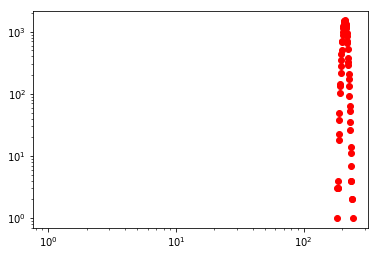

In [47]:
wsgdh = nx.degree_histogram(wsg)
plt.xscale("log")
plt.yscale("log")
plt.plot(wsgdh, "ro")

Degree distribution does not at all look like the degree distribution of our real world network. So this doesn't work.

## Check the Clustering Coefficient

In [48]:
average_clustering(wsg, trials=10000)

0.2394

##### Clustering coefficient of our real-world network was 0.24 
* Clustering coefficient of this network is 0.23 which is quite close! 
* Although degree distribution does not reflect real graph, clustering coefficient does. 
* Perhaps some element of Watts-Strogatz process operating in twitter graph: some of your friends are "given", while others you find with a random element.

## Check the Average Shortest Path

In [49]:
estimate_asp(wsg)

2.4202900000000001

* Average shortest path in Twitter network was 2.69; here, it's 2.414. 
* Shortest path measure is not that far off. In fact, it's closer.

# Preferential Attachment Model
* New links between two nodes are added to network based on preference to attach to nodes that already have a higher degree*. 
* "Rich-get-richer" property, whereby new connections are more likely to be added to high degree nodes than low degree nodes. 

To make a synthetic preferential attachment model, we need two parameters: $n$, the number of nodes, and $m$, the average expected degree. To form the artifical model, we start with a set of nodes, and gradually start adding nodes with an average of $m$ outgoing edges. At first, these outgoing edges will find targets randomly, but as the graph is grown the new $m$ edges will have a higher probability of being attached to nodes that have accumulated many other edges. We'll take $n$ and from our real-world network and use the median degree of our network to model $m$. To make our preferential attachment graph, we'll use a NetworkX method called ``barabasi_albert_graph``. 

In [52]:
edges_per_node = G.number_of_edges()/G.number_of_nodes()
edges_per_node = edges_per_node/2
edges_per_node

52.64069453691698

In [53]:
n = G.number_of_nodes()
degrees_per_node = int(G.number_of_edges()/G.number_of_nodes())
degrees_per_node

105

In [51]:
bag = nx.generators.barabasi_albert_graph(n, degrees_per_node)

## Degree Distribution

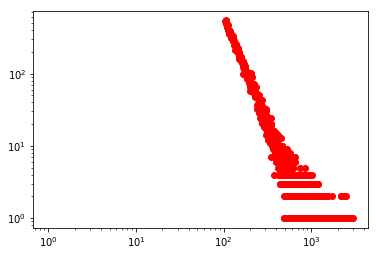

In [54]:
bagdh = nx.degree_histogram(bag)
plt.xscale("log")
plt.yscale("log")
plt.plot(bagdh, "ro")

**Preferential attachment model** more closely approximates degree distribution of Twitter network than random or Small-World models, but not exactly. 

### See a line on the log-log plot, 
* but the slope is too steep and the starting point has to start at the value we assigned to $m$. 
* In approximating degree distribution, we've are closer, but not there. 

## Average Clustering Coefficient

In [55]:
average_clustering(bag, trials=10000)

0.0307

The Barabasi-Albert model significantly underestimates the clustering coefficient.

## Average Shortest Path Length

In [56]:
estimate_asp(bag)

2.1724299999999999

This model slightly overshoots the average shortest path length, but not by a very wide margin. 

# Conclusions
* Models are abstractions and simplifications of reality.
* Models are never perfect imitations of the real world.
* Models are estimations and approximations of complex phenomenon. 

## Three network models:
* Random Erdos-Renyi graph
* Small world network (Watts & Strogatz)
* Preferential attachment (Barabasi-Albert) graph 

### Networks are formed by set of simple rules. 
* Small-world network approximated real-world network's clustering coefficient and shortest path length, but distribution of degrees was off. 
* Preferential attachment model captured the pattern in the degree distribution, but missed the clustering coefficient. 

#### Baseed on example above,
* In aggregate, there is a *degree* of randomisity in relationship formation, that the idea that people have a "core" of connections to begin with as in the Small-World model holds merit, 
* There is some sort of influence of preferential attachment, whereby Tweeters or Facebook users with more connections are likely to garner even more.